### An example showing the plot_feature_importances method used by a scikit-learn classifier

In this example, we'll be plotting a `feature_importances` to describe the classifier model performance
using the **breast_cancer**, **iris** or **digits** dataset from scikit-learn.
- `LogisticRegression`
- `RandomForestClassifier`

Here, we'll be using the `scikitplot.estimators.plot_feature_importances` method.

In [1]:
from sklearn.datasets import load_iris as data_3_classes
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

import numpy as np
np.random.seed(0)
# importing pylab or pyplot
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 5)

# Import scikit-plot
import scikitplot as sp

sp.__version__

'0.5.0.dev0+git.20250430.079ba10'

In [2]:
sp.estimators.plot_feature_importances?

Signature:
sp.estimators.plot_feature_importances(
    estimator,
    *,
    feature_names=None,
    class_index=None,
    threshold=None,
    title='Feature Importances',
    title_fontsize='large',
    text_fontsize='medium',
    cmap='PiYG',
    order=None,
    orientation='vertical',
    x_tick_rotation=None,
    bar_padding=11,
    digits=4,
    display_bar_label=True,
    **kwargs,
)
Docstring:
Generates a plot of a sklearn model's feature importances.

This function handles different types of classifiers and their respective
feature importances (``feature_importances_``) or coefficient (``coef_``) attributes,
if not provide its compute sklearn permutation importances.
It supports models wrapped in pipelines.

Supports models like:

- :py:class:`~sklearn.linear_model.LinearRegression`
- :py:class:`~sklearn.linear_model.LogisticRegression`
- :py:class:`~sklearn.neighbors.KNeighborsClassifier`
- :py:class:`~sklearn.svm.LinearSVC`
- :py:class:`~sklearn.svm.SVC`
- :py:class:`~sklearn

In [3]:
# Load the data
X, y = data_3_classes(return_X_y=True, as_frame=True)
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.5, random_state=0
)

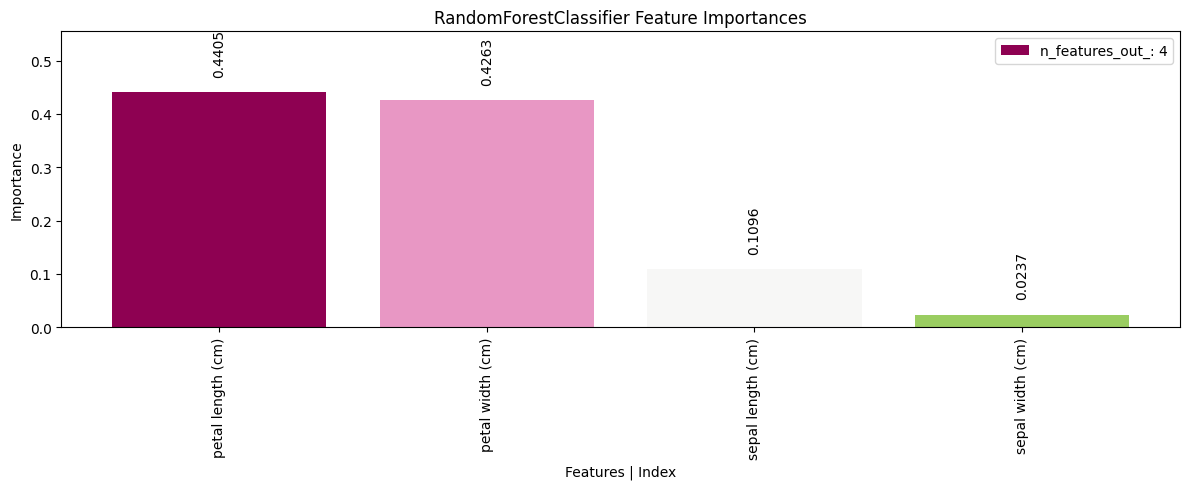

array(['petal length (cm)', 'petal width (cm)', 'sepal length (cm)',
       'sepal width (cm)'], dtype=object)

In [4]:
# Create an instance of the LogisticRegression
model = (
    RandomForestClassifier(random_state=0)
    .fit(X_train, y_train)
)

# Plot!
ax, features = sp.estimators.plot_feature_importances(
	model
	# feature_names=['petal length', 'petal width', 'sepal length', 'sepal width'],
)

features

In [5]:
dict(zip(model.feature_importances_, model.feature_names_in_))

{np.float64(0.10957240106587678): 'sepal length (cm)',
 np.float64(0.023672140772396162): 'sepal width (cm)',
 np.float64(0.4405042679643881): 'petal length (cm)',
 np.float64(0.4262511901973389): 'petal width (cm)'}

## Catboost

In [6]:
# !pip install catboost -Uq
from catboost import CatBoostClassifier, Pool
from sklearn.datasets import make_multilabel_classification
from sklearn.model_selection import train_test_split

### Generate synthetic dataset

In [7]:
X, Y = make_multilabel_classification(
	n_samples=500,
    n_features=20,
    n_classes=5,
    random_state=0,
)
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, random_state=0
)
train_pool = Pool(X_train, Y_train)
test_pool = Pool(X_test, Y_test)

In [8]:
X_train

array([[2., 4., 3., ..., 6., 5., 2.],
       [2., 1., 1., ..., 1., 1., 4.],
       [1., 4., 2., ..., 5., 1., 3.],
       ...,
       [4., 2., 1., ..., 2., 5., 1.],
       [4., 2., 3., ..., 2., 4., 2.],
       [3., 7., 2., ..., 5., 3., 3.]], shape=(375, 20))

### Train model

In [9]:
clf = CatBoostClassifier(
	loss_function='MultiLogloss',
	eval_metric='HammingLoss',
	iterations=500,
	class_names=['A', 'B', 'C', 'D', 'E'],
)
%time clf.fit(train_pool, eval_set=test_pool, metric_period=10, plot=False, verbose=100)

Learning rate set to 0.033623
0:	learn: 0.3056000	test: 0.3072000	best: 0.3072000 (0)	total: 952ms	remaining: 7m 55s
100:	learn: 0.0389333	test: 0.2064000	best: 0.2064000 (100)	total: 1.23s	remaining: 4.86s
200:	learn: 0.0069333	test: 0.2112000	best: 0.2016000 (160)	total: 1.44s	remaining: 2.15s
300:	learn: 0.0005333	test: 0.2000000	best: 0.2000000 (290)	total: 1.64s	remaining: 1.08s
400:	learn: 0.0000000	test: 0.2112000	best: 0.2000000 (290)	total: 1.87s	remaining: 461ms
499:	learn: 0.0000000	test: 0.2048000	best: 0.2000000 (290)	total: 2.06s	remaining: 0us

bestTest = 0.2
bestIteration = 290

Shrink model to first 291 iterations.
CPU times: user 14 s, sys: 2.74 s, total: 16.7 s
Wall time: 7.46 s


INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should

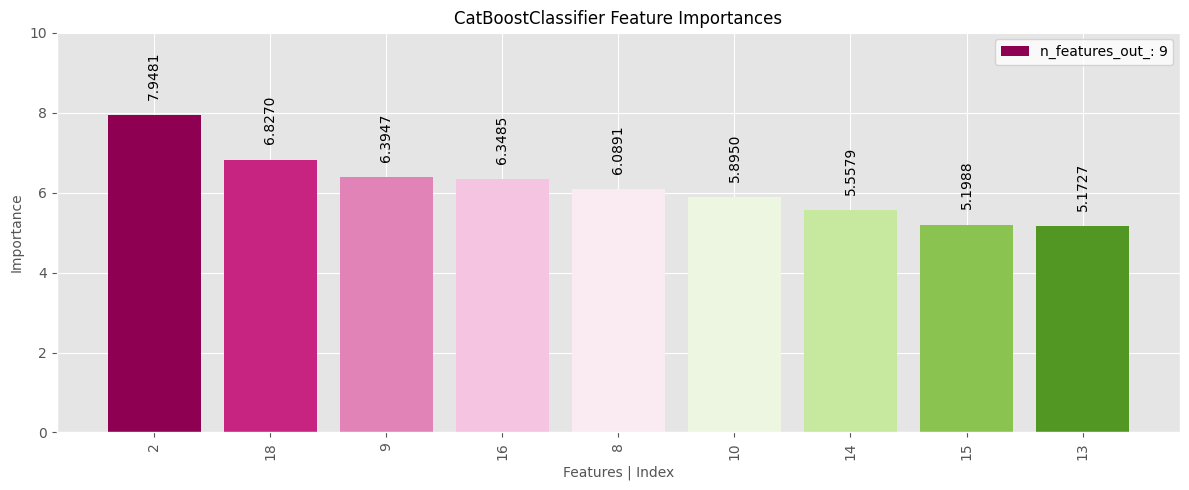

array([2, 18, 9, 16, 8, 10, 14, 15, 13], dtype=object)

In [10]:
# Plot!
ax, features = sp.estimators.plot_feature_importances(
	clf, threshold=5, feature_names=range(X_train.shape[1]),
	plot_style='ggplot',
)
features